# <h1 style="font-family: Trebuchet MS; padding: 8 px; font-size: 38px; color: #4A1B8C; text-align: center; line-height: 1.2;"><b>Propensity model for bank </b> <br> Train models

## Load libraries and data

In [ ]:
pip install catboost


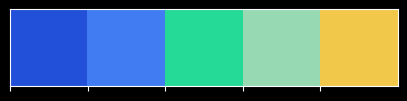

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import pickle

#-----------------------------
from sklearn.model_selection import KFold, cross_validate, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from catboost import CatBoostClassifier
#-----------------------------
import warnings
warnings.filterwarnings("ignore")

class clr:
    S = '\033[1m' + '\033[94m'
    E = '\033[0m'

my_colors = ['#2350D9', '#417CF2', '#25D997', '#96D9B3', '#F2C84B']
CMAP1 = ListedColormap(my_colors)
plt.style.use('dark_background')

sns.palplot(sns.color_palette(my_colors))

RANDOM_STATE=42

In [38]:
data = pd.read_csv('/content/final.csv')
data.head()

,AGREEMENT_RK,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,OWN_AUTO,FL_PRESENCE_FL,FAMILY_INCOME,PERSONAL_INCOME,CREDIT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,TARGET
0,60099204,42,1,Среднее,Не состоял в браке,1,0,1,0,0,1,от 20000 до 50000 руб.,25000,5588,1,0,1
1,62244665,28,1,Среднее специальное,Состою в браке,1,1,1,0,0,0,от 10000 до 20000 руб.,10000,19498,1,0,0
2,61050759,64,0,Среднее специальное,Состою в браке,2 и больше,0,1,1,1,0,от 20000 до 50000 руб.,30000,15470,1,1,0
3,62079659,54,1,Среднее специальное,Состою в браке,0,0,1,0,1,1,от 20000 до 50000 руб.,25000,13960,1,0,0
4,66583553,26,0,Среднее специальное,Состою в браке,1,1,1,0,0,1,от 10000 до 20000 руб.,15000,11890,2,2,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15006 entries, 0 to 15005
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AGREEMENT_RK       15006 non-null  int64 
 1   AGE                15006 non-null  int64 
 2   GENDER             15006 non-null  int64 
 3   EDUCATION          15006 non-null  object
 4   MARITAL_STATUS     15006 non-null  object
 5   CHILD_TOTAL        15006 non-null  object
 6   DEPENDANTS         15006 non-null  object
 7   SOCSTATUS_WORK_FL  15006 non-null  int64 
 8   SOCSTATUS_PENS_FL  15006 non-null  int64 
 9   OWN_AUTO           15006 non-null  int64 
 10  FL_PRESENCE_FL     15006 non-null  int64 
 11  FAMILY_INCOME      15006 non-null  object
 12  PERSONAL_INCOME    15006 non-null  int64 
 13  CREDIT             15006 non-null  int64 
 14  LOAN_NUM_TOTAL     15006 non-null  int64 
 15  LOAN_NUM_CLOSED    15006 non-null  int64 
 16  TARGET             15006 non-null  int64

In [40]:
features_data = data.drop(['TARGET'], axis=1)
target_data = data['TARGET']

## Data preprocessing

Split data to train and test samples

In [41]:
X_train, X_test, y_train, y_test = train_test_split(features_data, target_data, test_size=0.2, random_state=42)

<Axes: >

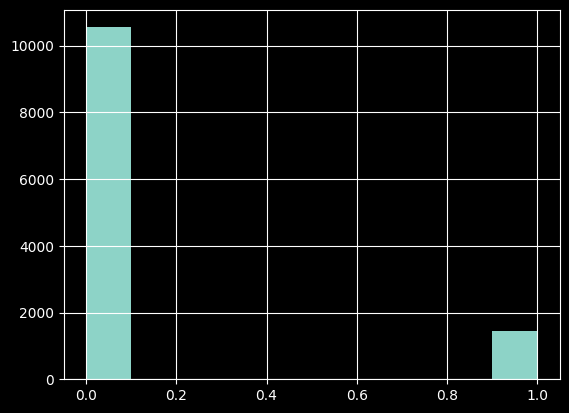

In [42]:
y_train.hist()

Scale numeric columns and coding categorical features

In [43]:
numeric = ['AGE', 'PERSONAL_INCOME', 'CREDIT', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']
categorical = ['GENDER', 'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL', 'DEPENDANTS',
               'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'OWN_AUTO',
               'FL_PRESENCE_FL', 'FAMILY_INCOME']

In [44]:
col_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numeric),
        ('ohe', OneHotEncoder(sparse=False, drop='first'), categorical)],
    remainder="passthrough"
)

In [45]:
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

In [46]:
print(clr.S + 'Train sample size ' + clr.E + f'{X_train.shape}')
print(clr.S + 'Test sample size ' + clr.E + f'{X_test.shape}')

Train sample size (12004, 25)
Test sample size (3002, 25)


## Logistic Regression

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
probs = model.predict_proba(X_test)
pred_test = model.predict(X_test)

In [50]:
print(clr.S + 'Accuracy ' + clr.E + f'{accuracy_score(y_test, pred_test)}')
print(clr.S + 'Recall ' + clr.E + f'{recall_score(y_test, pred_test)}')
print(clr.S + 'Precision ' + clr.E + f'{precision_score(y_test, pred_test)}')
print(clr.S + 'F1-score ' + clr.E + f'{f1_score(y_test, pred_test)}')

Accuracy 0.8874083944037309
Recall 0.0
Precision 0.0
F1-score 0.0


In [51]:
confusion_matrix(y_test, pred_test)

array([[2664,    0],
       [ 338,    0]])

Model can't correctly identify churn customers.
Since we have imbalanced data, let's try to move thresholds to optimize recall/presicion

### Optimal Threshold for Precision-Recall Curve

In [52]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=RANDOM_STATE)

In [53]:
print(clr.S + 'Train sample size ' + clr.E + f'{X_train_1.shape}')
print(clr.S + 'Validation sample size ' + clr.E + f'{X_val.shape}')

Train sample size (8042, 25)
Validation sample size (3962, 25)


Calculate the precision and recall for each threshold and create a precision-recall plot

The best threshold will be considered with recall > 0.66 and maximum precision

Best Threshold 0.09400403392270922
Best Recall 0.9674620390455532
Best Precision 0.11808313476303944


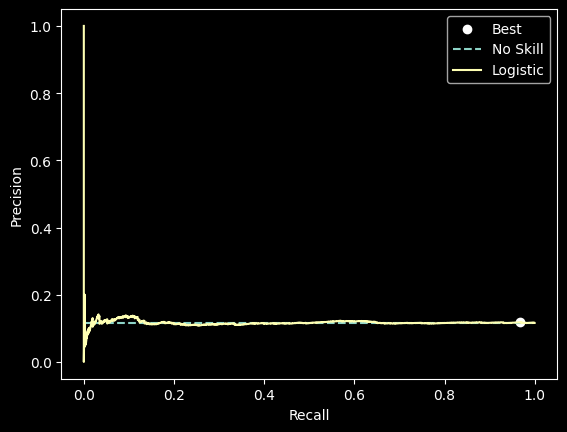

In [54]:
# predict probabilities
yhat = model.predict_proba(X_val)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_val, yhat)
# plot the roc curve for the model
no_skill = len(y_val[y_val==1]) / len(y_val)

indexes = [
    index for index in range(len(recall))
    if recall[index] > 0.66
]
ix = np.argmax(precision[indexes])
print(clr.S + 'Best Threshold ' + clr.E + f'{thresholds[ix]}')
print(clr.S + 'Best Recall ' + clr.E + f'{recall[ix]}')
print(clr.S + 'Best Precision ' + clr.E + f'{precision[ix]}')
plt.scatter(recall[ix], precision[ix], marker='o', color='white', label='Best')
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, label='Logistic')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

With threshold 0.1 we get best Recall 0.97 with max precision 0.12

### Gridsearch


Hyperparameters tuning with GridSearchCV

In [55]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2", None], "solver":['lbfgs', 'liblinear']}
logreg=LogisticRegression(n_jobs=-1)
logreg_cv=GridSearchCV(logreg, grid, scoring='recall' ,cv=10)
logreg_cv.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', None],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='recall')

In [56]:
logreg_cv_pred = logreg_cv.predict(X_val)
print(clr.S + 'Accuracy ' + clr.E + f'{accuracy_score(y_val, logreg_cv_pred)}')
print(clr.S + 'Recall ' + clr.E + f'{recall_score(y_val, logreg_cv_pred)}')
print(clr.S + 'Precision ' + clr.E + f'{precision_score(y_val, logreg_cv_pred)}')
print(clr.S + 'F1-score ' + clr.E + f'{f1_score(y_val, logreg_cv_pred)}')

Accuracy 0.8833922261484098
Recall 0.0021691973969631237
Precision 0.3333333333333333
F1-score 0.004310344827586207


With standart threshold tuned linear model shows quite low recall and precision;

Let's optimize threshold for best recall and precision

Best Threshold 0.1206427742677857
Best Recall 0.6616052060737527
Best Precision 0.1636266094420601


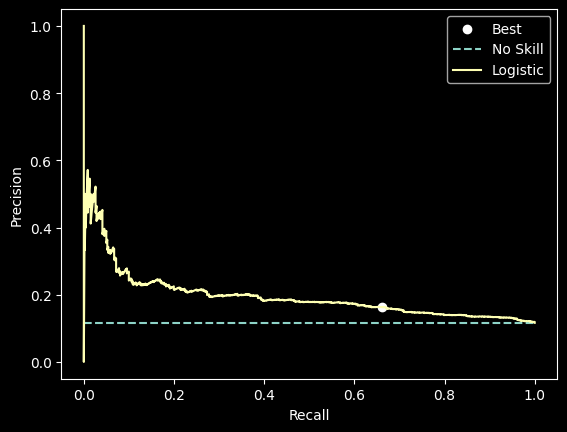

In [57]:
probs_churn = logreg_cv.predict_proba(X_val)[:, 1]
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_val, probs_churn)
# plot the roc curve for the model
no_skill = len(y_val[y_val==1]) / len(y_val)

indexes = [
    index for index in range(len(recall))
    if recall[index] > 0.66
]
ix = np.argmax(precision[indexes])
print(clr.S + 'Best Threshold ' + clr.E + f'{thresholds[ix]}')
print(clr.S + 'Best Recall ' + clr.E + f'{recall[ix]}')
print(clr.S + 'Best Precision ' + clr.E + f'{precision[ix]}')
plt.scatter(recall[ix], precision[ix], marker='o', color='white', label='Best')
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, label='Logistic')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

## Test model

In [58]:
test_pred = logreg_cv.predict_proba(X_test)
classes = test_pred[:,1] > 0.12
print(clr.S + 'Accuracy ' + clr.E + f'{accuracy_score(y_test, classes)}')
print(clr.S + 'Recall ' + clr.E + f'{recall_score(y_test, classes)}')
print(clr.S + 'Precision ' + clr.E + f'{precision_score(y_test, classes)}')
print(clr.S + 'F1-score ' + clr.E + f'{f1_score(y_test, classes)}')


Accuracy 0.5493004663557628
Recall 0.6863905325443787
Precision 0.1568627450980392
F1-score 0.2553659878921299


On the test sample we obtained a higher recall and lower precision

### Feature importance

<Axes: ylabel='Feature'>

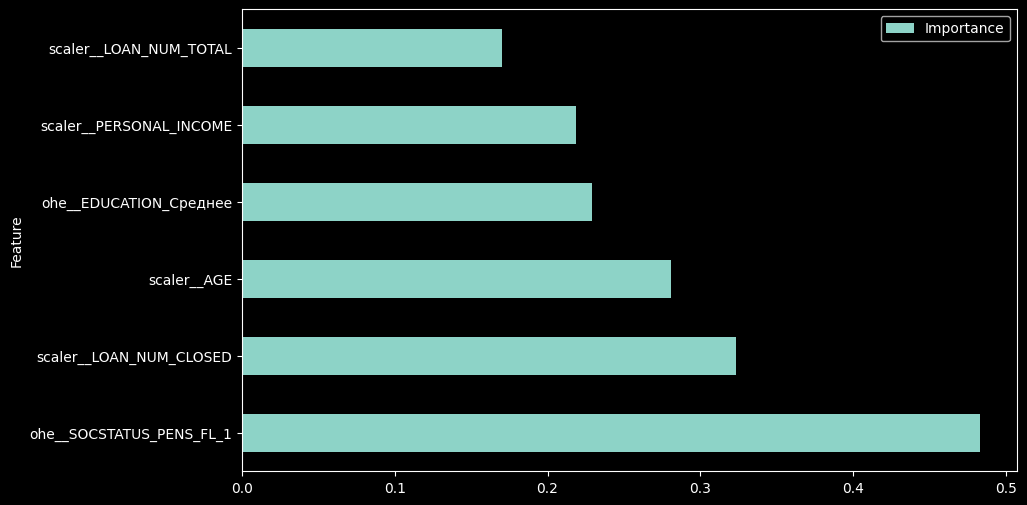

In [60]:
coefficients = logreg_cv.best_estimator_.coef_[0]

feature_importance = pd.DataFrame({'Feature': col_transformer.get_feature_names_out(), 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance[:6].plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [61]:
feature_importance[:10]

,Feature,Importance
18,ohe__SOCSTATUS_PENS_FL_1,0.483413
4,scaler__LOAN_NUM_CLOSED,0.323752
0,scaler__AGE,0.280675
7,ohe__EDUCATION_Среднее,0.229158
1,scaler__PERSONAL_INCOME,0.218727
3,scaler__LOAN_NUM_TOTAL,0.170175
12,ohe__MARITAL_STATUS_Состою в браке,0.144251
14,ohe__CHILD_TOTAL_2 и больше,0.143946
23,ohe__FAMILY_INCOME_свыше 50000 руб.,0.087728
6,ohe__EDUCATION_Неполное среднее,0.086895


Most important features are pension status, nymber of closed loans and age of client

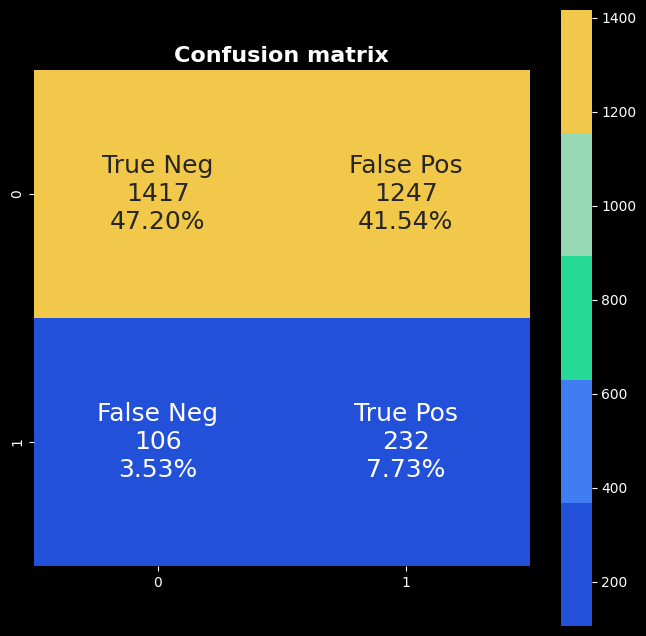

In [62]:
matrix = confusion_matrix(y_test, classes)
fig = plt.figure(figsize=(8, 8))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f'{v1}\n{v2}\n{v3}'for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap=my_colors,  annot_kws={"size":18}, square=True)
plt.title('Confusion matrix', size=16, weight="bold" )
plt.show()

The model is good at recognizing clients who will not response to bank. There are almost no FalseNegative answers.

## Catboost classifier

Train another classification model with hyperparameter tuning

In [ ]:
model = CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy', iterations=500)

grid = {'learning_rate': [0.01, 0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = model.grid_search(grid,
                                       X=X_train,
                                       y=y_train,
                                       cv=3)

In [64]:
grid_search_result['params']


{'depth': 4, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

Select the optimal threshold for CatBoost model

In [66]:
probs = model.predict_proba(X_val)
probs_churn = probs[:,1]
max_precision = 0

for i in np.arange(0, 1, 0.01):
    classes = probs_churn > i
    recall = recall_score(y_val, classes)
    precision = precision_score(y_val, classes)
    if precision > max_precision and recall > 0.66:
        max_precision = precision
        max_recall = recall
        max_class = i

print(f'Threshold {max_class}')
print(clr.S + 'Recall ' + clr.E + f'{max_recall}')
print(clr.S + 'Precision ' + clr.E + f'{max_precision}')

Threshold 0.15
Recall 0.6963123644251626
Precision 0.3150147203140334


CatboostClassifier shows better results then linear regression on validation sample

### Test model

In [67]:
test_pred = model.predict_proba(X_test)
classes = test_pred[:,1] > 0.15
print(clr.S + 'Accuracy ' + clr.E + f'{accuracy_score(y_test, classes)}')
print(clr.S + 'Recall ' + clr.E + f'{recall_score(y_test, classes)}')
print(clr.S + 'Precision ' + clr.E + f'{precision_score(y_test, classes)}')
print(clr.S + 'F1-score ' + clr.E + f'{f1_score(y_test, classes)}')

Accuracy 0.7191872085276483
Recall 0.45857988165680474
Precision 0.1901840490797546
F1-score 0.2688638334778838


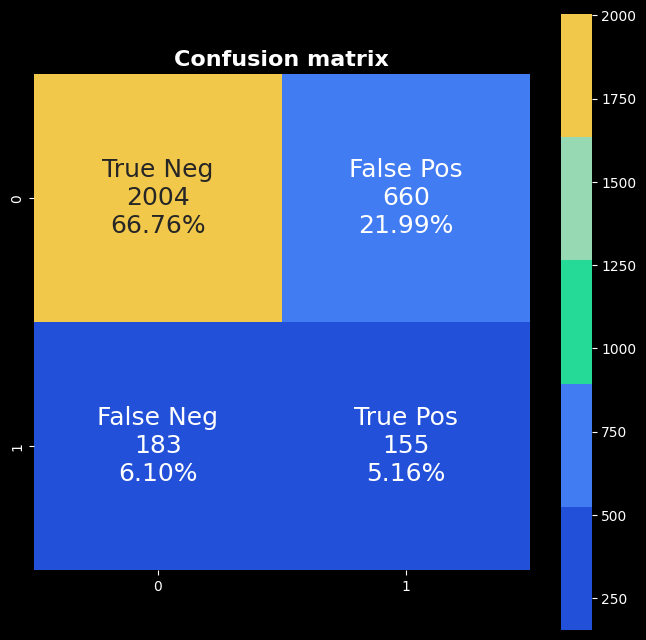

In [68]:
catboost_matrix = confusion_matrix(y_test, classes)
fig = plt.figure(figsize=(8, 8))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in catboost_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in catboost_matrix.flatten()/np.sum(catboost_matrix)]
labels = [f'{v1}\n{v2}\n{v3}'for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(catboost_matrix, annot=labels, fmt='', cmap=my_colors,  annot_kws={"size":18}, square=True)
plt.title('Confusion matrix', size=16, weight="bold" )
plt.show()

Catboost shows more True negative and less False positive results

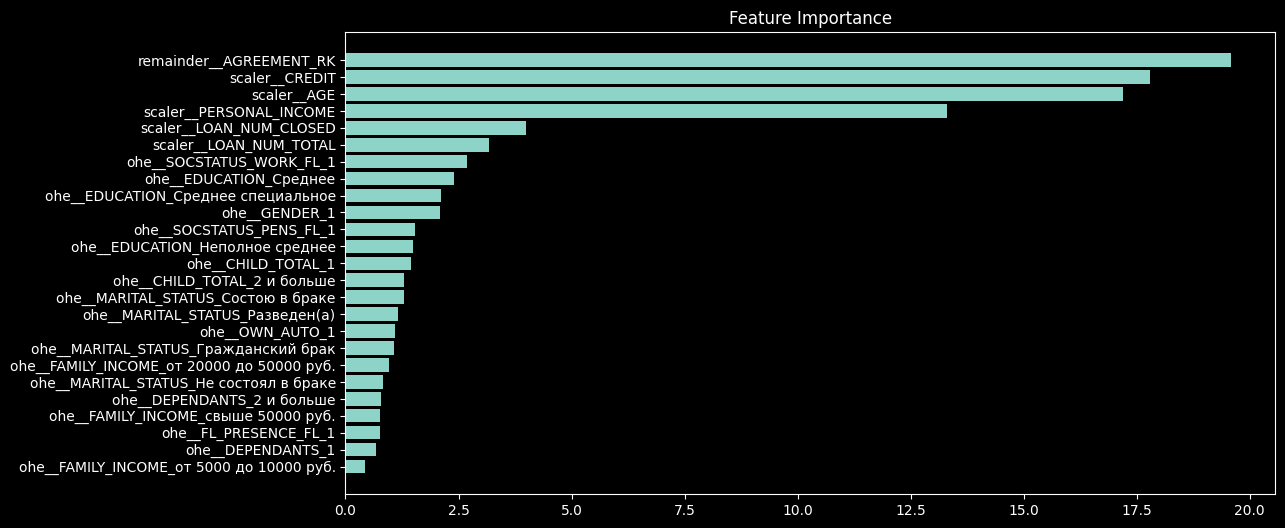

In [79]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), col_transformer.get_feature_names_out()[sorted_idx])
plt.title('Feature Importance');